In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.table import Table, join
import astropy.units as au
import astropy.constants as ac 

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in" 

# mpl.rc('text.latex', preamble=r'\usepackage{cmbright} \boldmath')
# mpl.rcParams['text.latex.preamble'] = [r'\boldmath']
# mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# mpl.rc('text', usetex=True)

cmap = mpl.cm.get_cmap('tab20')
cmap1 = cmap(np.arange(0,1,0.1))
cmap2 = cmap(np.arange(0.05,1,0.1))

In [2]:
def get_cmap(n, name='jet'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def get_HCNIR(HCN):
    """Jim ́enez-Donaire et al. Table 5"""
    IR = np.log10(10**2.89 * 10**HCN)
    return(IR)

def get_MdenseSFR(Mdense):
    """Lada"""
    SFR = 4.6e-8*Mdense
    return(SFR)

def get_Mdense(HCN, alphaHCN=10):
    """HCN in log - alpha = 10 Gao+Solomon"""
    Mdense = alphaHCN * (10**HCN)
    return(Mdense *au.Msun)

def get_SFR(IR):
    """HCN in log - 3.88 × 10−44 L(TIR) Murphy et al. (2011)"""
    conv = (3.88e-44*au.s/au.erg).to(1/au.Lsun).value

#     """HCN in log - 3.88 × 10−44 L(TIR) Murphy et al. (2011)"""
#     conv = (4.5e-44*au.s/au.erg).to(1/au.Lsun).value
    
    SFR = conv * (10**IR)
    return(SFR *au.Msun/au.yr)

In [12]:
np.log10((3.88e-44*au.s/au.erg).to(1/au.Lsun).value)

-9.828196345300986

In [4]:
"""CMZ properties"""

sfr_CMZ_L = np.log10(0.012)
gas_CMZ_L = np.log10(1.8e7)

sfr_CMZ_H = np.log10(0.14)
gas_CMZ_H = np.log10(5.3e7)

In [5]:
"""literature properties"""

table = Table.read('./../data_lada/galaxies_MJD.csv')
table['logLHCN'].unit = au.K * au.km/ au.s/ au.pc**2
table['logLIR'].unit = au.Lsun

Mdense = get_Mdense(table['logLHCN'], 5) 
table.add_column(Mdense, name='Mdense') 
SFR = get_SFR(table['logLIR']) 
table.add_column(SFR, name='SFR') 

table_E = Table.read('./../data_lada/empirecents_MJD.csv')
table_E['logLHCN'].unit = au.K * au.km/ au.s/ au.pc**2
table_E['logLIR'].unit = au.Lsun

Mdense = get_Mdense(table_E['logLHCN'], 5) 
table_E.add_column(Mdense, name='Mdense') 
SFR = get_SFR(table_E['logLIR']) 
table_E.add_column(SFR, name='SFR')

table_MW = Table.read('./../data_lada/MWCMZ_MJD.csv')
table_MW['logLHCN'].unit = au.K * au.km/ au.s/ au.pc**2
table_MW['logLIR'].unit = au.Lsun

Mdense = get_Mdense(table_MW['logLHCN'], 5) 
table_MW.add_column(Mdense, name='Mdense') 
SFR = get_SFR(table_MW['logLIR']) 
table_MW.add_column(SFR, name='SFR')

table_cl = Table.read('./../data_lada/clouds_lada.csv')
table_cl['Mdense'].units = au.Msun
table_cl['SFR'].units = au.Msun/au.yr

table_MWevo = Table.read('./../data_lada/MWCMZevo_KK.csv')
table_MWevo['Sigma_mol'].unit = Mdense.unit * au.pc**-2
table_MWevo['Sigma_SFR'].unit = SFR.unit * au.pc**-2

Mdense = table_MWevo['Sigma_mol'] * 500*au.pc * 100*au.pc
SFR = table_MWevo['Sigma_SFR'] * 500*au.pc * 100*au.pc
table_MWevo.add_column(Mdense, name='Mdense') 
table_MWevo.add_column(SFR, name='SFR')

table_ce = Table.read('./../data_lada/clouds_evans.csv')
table_ce['Mdense'].unit = au.Msun
table_ce['SFR'].unit = au.Msun/au.yr

table_cvt1 = Table.read('./../data_lada/clouds_V16_t1.fits')
table_cvt2 = Table.read('./../data_lada/clouds_V16_t2.fits')
table_cvt1['MCloud'].unit = au.Msun * 1e3
table_cvt1['SFR-Rad'].unit = au.Msun / au.Myr
table_cvt1['SFR-MIR'].unit = au.Msun / au.Myr

table_cv = join(table_cvt1, table_cvt2, join_type='outer')
ids = table_cv['Mdense']/table_cv['e_Mdense'] > 3

(-7.0, 4.2)

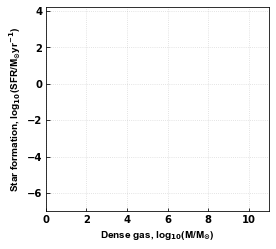

In [6]:
fig = plt.figure(figsize = (4, 3.75))
ax = fig.add_subplot(111)

xl = r'Dense gas, log$_{10}$(M/M$_\mathrm{\odot}$)'
yl = 'Star formation, log$_{10}$(SFR/M$_\mathrm{\odot}$yr$^{-1}$)'
ax.set_xlabel(xl, fontname="Arial", weight='heavy')
ax.set_ylabel(yl, fontname="Arial", weight='heavy')

ax.grid(True, ls=':', zorder=-1, alpha=0.5)

# ax.set_xscale('log')
# ax.set_yscale('log')

# ax.set_xticks(np.logspace(1, 15, 15))
# ax.set_yticks(np.logspace(-15, 15, 31))

ax.set_xlim([0, 11])
ax.set_ylim([-7, 4.2])

In [7]:
"""Star formation relations"""
x = np.logspace(-15, 15, 31)
ax.plot(np.log10(x), np.log10(get_MdenseSFR(x)), 
        linestyle='--', color = 'black', 
        alpha=0.7, zorder=0, label='Lada et al. (2012)')

ax.legend(loc='lower right',ncol=1,
            scatterpoints=1, fontsize=8)

In [8]:
"""Literature properties"""

"""Milky Way Clouds"""
x = np.log10(np.hstack([table_cl['Mdense'],table_ce['Mdense']]))
y = np.log10(np.hstack([table_cl['SFR'],table_ce['SFR']]))

ax.scatter(x, y, 
           ec='none', 
           fc='grey',
           s=25)

ax.scatter(x, y, 
           ec='none', 
           fc='white',
           s=12)

ax.scatter(x, y, 
           ec='none', 
           fc='grey',
           s=12,
           alpha=0.2)

"""Extragalatic"""
table['Mdense'] = np.log10(table['Mdense'])
table['SFR'] = np.log10(table['SFR'])

refs = list(np.unique(table['Ref']))
refs.remove('Gallagher18')
cmap = get_cmap(len(refs))

for i, ref in enumerate(refs):
    
    ids = np.where(table['Ref']==ref)
    x = table['Mdense'][ids]
    y = table['SFR'][ids]
    
    ax.scatter(x, y, 
               ec='none', 
               fc='grey',
               s=25)

for i, ref in enumerate(refs):
    
    ids = np.where(table['Ref']==ref)
    x = table['Mdense'][ids]
    y = table['SFR'][ids]
    
    ax.scatter(x, y, 
               ec='none', 
               fc='white',
               s=12)

for i, ref in enumerate(refs):
    
    ids = np.where(table['Ref']==ref)
    x = table['Mdense'][ids]
    y = table['SFR'][ids]
    
    ax.scatter(x, y, 
               ec='none', 
               fc='grey',
               s=12,
               label=ref,
               alpha=0.2)

/Users/ashleybarnes/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/ashleybarnes/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


In [9]:
"""Literatur properties CMZs"""

ref = 'Gallagher18'
ids = np.where(table['Ref']==ref)
x = table['Mdense'][ids]
y = table['SFR'][ids]

ax.scatter(x, y, fc=cmap2[1], ec=cmap1[1], lw=2)
ax.scatter(x, y, fc=cmap2[1], ec=cmap1[1], lw=2)

table_E['Mdense'] = np.log10(table_E['Mdense'])
table_E['SFR'] = np.log10(table_E['SFR'])

ax.scatter(table_E['Mdense'], table_E['SFR'], fc=cmap2[1], ec=cmap1[1], lw=2)
ax.scatter(table_E['Mdense'], table_E['SFR'], fc=cmap2[1], ec=cmap1[1], lw=2)

In [10]:
"""CMZ properties"""
# ax.plot(table_MWevo['Mdense'], table_MWevo['SFR'],
#         c='blue', ls='--', zorder=11)

# ax.errorbar(table_MW['Mdense'].quantity.value, 0.02, yerr=np.array([[0.01,0.08]]).T, 
#             zorder=11, c='black', 
#             capsize=1.5, 
#             elinewidth=0.9,
#             capthick=0.9)

ax.scatter(gas_CMZ_L, sfr_CMZ_L, fc=cmap2[0], ec=cmap1[0], lw=2, zorder=2)
ax.scatter(gas_CMZ_H, sfr_CMZ_H, fc=cmap2[0], ec=cmap1[0], lw=2, zorder=2)
ax.plot([gas_CMZ_L, gas_CMZ_H], 
        [sfr_CMZ_L, sfr_CMZ_H], 
        c=cmap1[0], lw=2, zorder=1, 
        ls='-')

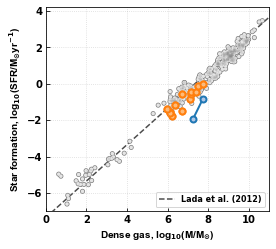

<Figure size 432x288 with 0 Axes>

In [11]:
plt.tight_layout()
fig.savefig('./../figs/lada_plot_phys.pdf',bbox_inches='tight')
fig